In [2]:
import torch
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
"""
Linronald 201901
guide:
when using this script, 
firstly run all function definition blocks.
then, run the 'case' block of any type of signal formula, e.g. bipolar/case
the generated signals will be saved as variable 'ys'.
So that you can 'plot current ys'
and 'DO SAVE'
"""

## bipolar

In [195]:
def bipolar(x,amp,width,damp,x0):
    xp = x-x0
    return amp*np.tanh(width*xp)*np.exp(-damp*xp*xp)

###  case

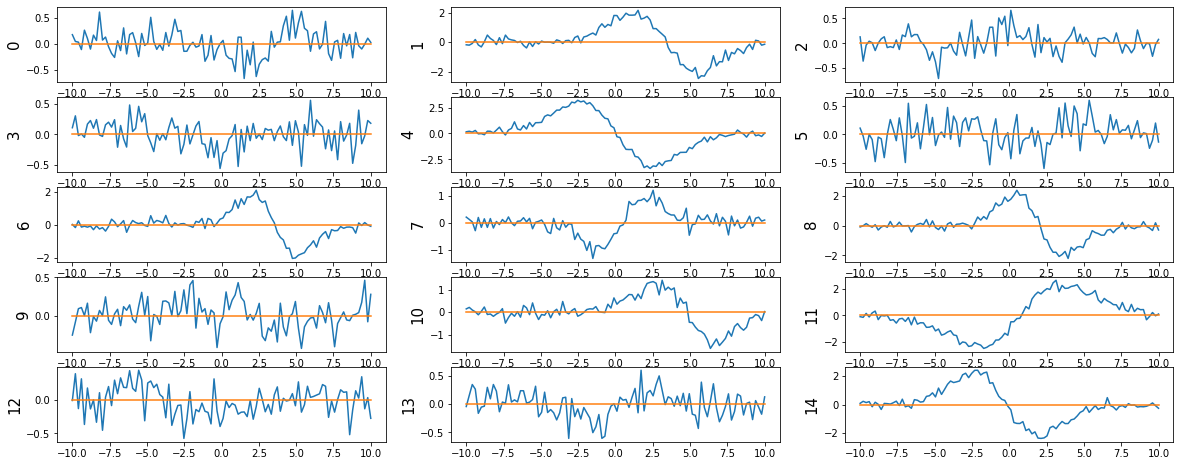

In [223]:
fig,ax = plt.subplots(5,3,figsize=(20,8))
x = np.linspace(-10,10,100)
ys = list()
num=0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        amplitude = 15 * (np.random.rand(1)-0.5)
        width_ = 0.025 + np.random.rand(1)*0.4
        damp_ = 0.05 + np.random.rand(1)*0.15
        x0_ = (np.random.rand(1)-0.5)*10
        y = bipolar(x,amplitude,width_,damp_,x0_)
        noise = 0.2*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(num,fontsize=15)
        num +=1

## my tanh

In [226]:
def my_tanh(x,amp,width,x0):
    xp = x-x0
    return amp*np.tanh(width*xp)

### case

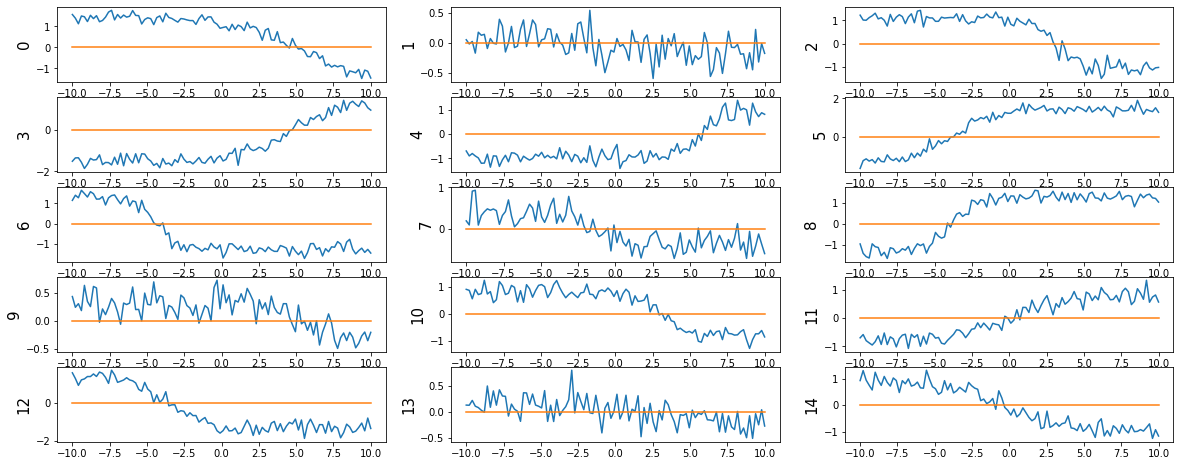

In [261]:
fig,ax = plt.subplots(5,3,figsize=(20,8))
x = np.linspace(-10,10,100)
ys = list()
num=0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        amplitude = 3 * (np.random.rand(1)-0.5)
        width_ = 0.2 + np.random.rand(1)*0.5
        x0_ = (np.random.rand(1)-0.5)*12
        y = my_tanh(x,amplitude,width_,x0_)
        noise = 0.2*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(num,fontsize=15)
        num +=1

## gaussian

In [182]:
def gaussian(x,amp,damp,x0):
    xp = x-x0
    return amp*np.exp(-damp*xp*xp)

### case

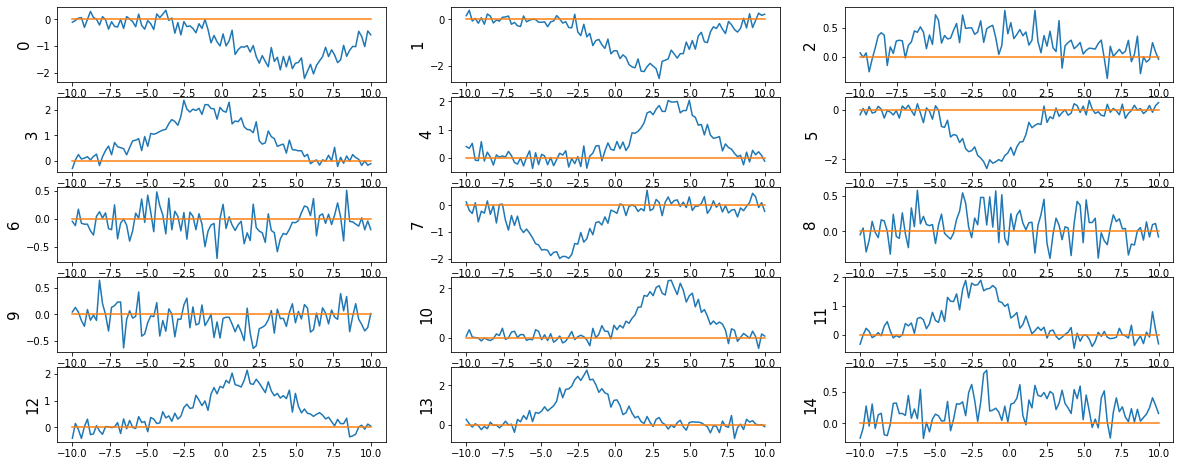

In [281]:
fig,ax = plt.subplots(5,3,figsize=(20,8))
x = np.linspace(-10,10,100)
ys = list()
num=0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        amplitude = 5 * (np.random.rand(1)-0.5)
        damp_ = 0.01 + np.random.rand(1)*0.15
        x0_ = (np.random.rand(1)-0.5)*10
        y = gaussian(x,amplitude,damp_,x0_)
        noise = 0.2*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(num,fontsize=15)
        num +=1

## sinusoidal

In [5]:
def sinusoidal(x,amp,omega,phi):
    # no x0
    # no need to set negative amplitude, but it's okay.
    return amp*np.sin(omega*x+phi)

### case

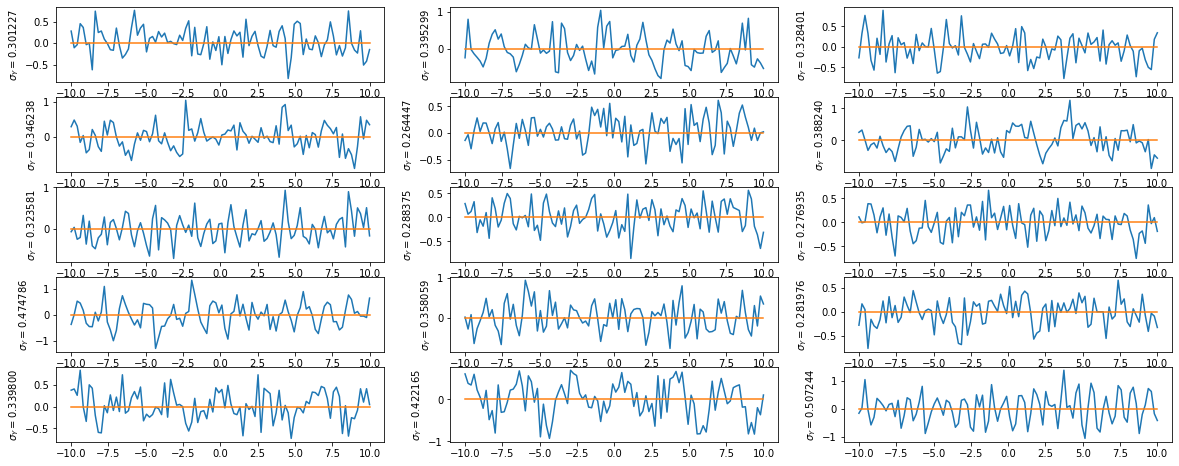

In [288]:
fig,ax = plt.subplots(5,3,figsize=(20,8))
x = np.linspace(-10,10,100)
ys = list()
for i in range(len(ax)):
    for j in range(len(ax[0])):
        amplitude = 1 * (np.random.rand(1)-0.5)
        omega_ = np.pi/2+np.pi*2*np.random.rand(1)
        phi_ = np.pi*2*np.random.rand(1)
        y = sinusoidal(x,amplitude,omega_,phi_)
        noise = 0.3*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel('$\sigma_Y =$%4f' % ys[-1].std())

## linear

In [147]:
def linear(x,k,x0):
    xp = x-x0
    return k*xp

### case

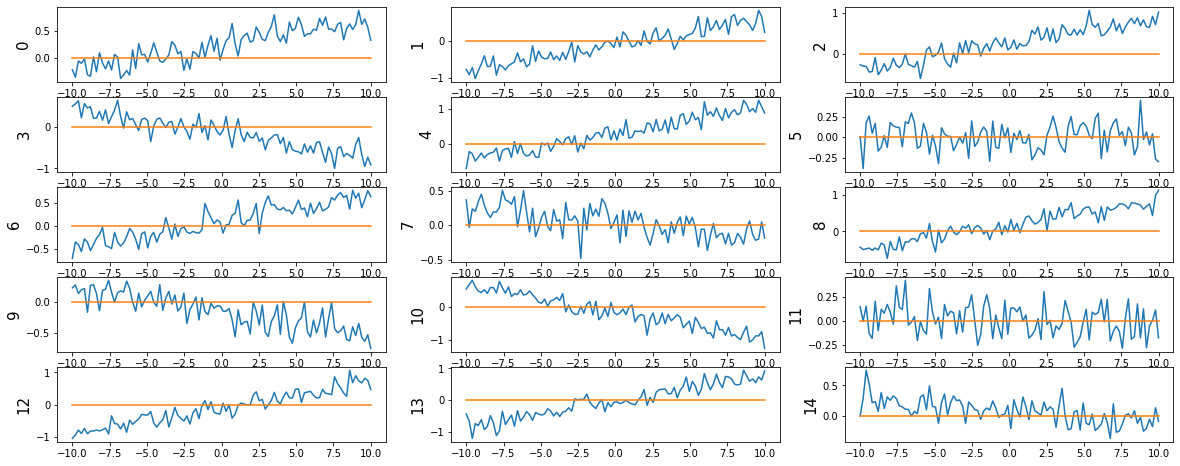

In [179]:
fig,ax = plt.subplots(5,3,figsize=(20,8))
x = np.linspace(-10,10,100)
ys = list()
num=0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        k_ = 0.2*(np.random.rand(1)-0.5)
        x0_ = (np.random.rand(1)-0.5)*12
        y = linear(x,k_,x0_)
        noise = 0.16*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(num,fontsize=15)
        num +=1

## dip

In [32]:
def dip(x,amp,spand,x0):
    xp = x-x0
    return amp*np.log(np.abs(xp)+1)

### case

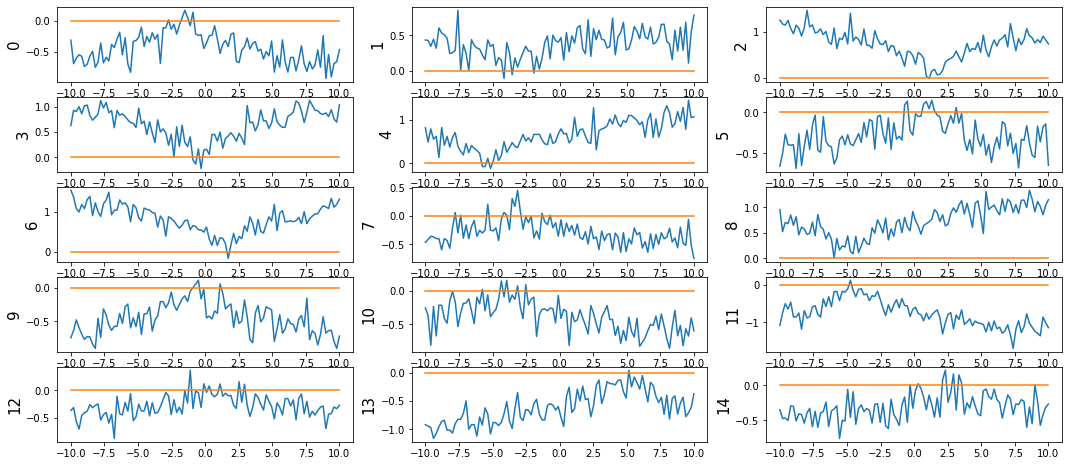

In [143]:
fig,ax = plt.subplots(5,3,figsize=(18,8))
x = np.linspace(-10,10,100)
ys = list()
num = 0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        amplitude =(np.random.rand(1)-0.5)
        spand_ = np.random.rand(1)+1
        x0_ = (np.random.rand(1)-0.5)*12
        y = dip(x,amplitude,spand_,x0_)
        noise = 0.16*np.random.randn(np.shape(x)[0])
        ys.append(y+noise)
        _ = ax[i,j].plot(x,ys[-1])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(num,fontsize=15)
        num +=1

## def save data and plot

In [9]:
def save_data_n_plot(signal_list,signal_type, indices_wanted, crnt_numer):
    # current number
    # when apply this function, the input number of file would be updated,
    # and the updated is the output of this function.
    # so one should use this like:
    # current_num = 0
    # current_num = save_data_n_plot(ys,'dip',[3,8],current_num)
    # current_num = save_data_n_plot(ys,'dip',[1,5,7],current_num) # for the following.
    current_number = crnt_numer
    for i in indices_wanted:
        filename = ''.join(['data/signal',str(current_number),'_type=',signal_type])
        print(i,':',filename)
        np.save(filename,signal_list[i])
        fig = plt.figure(figsize=(6,2))
        _= plt.plot(x,signal_list[i])
        _= plt.plot((-10,10),(0,0))
        _= plt.xlabel('x')
        _= plt.ylabel('y')
        _= plt.title(signal_type)
        figname = ''.join(['img/signal',str(current_number),'_type=',signal_type])
        plt.savefig(figname)
        current_number+=1
    return current_number

## plot current ys

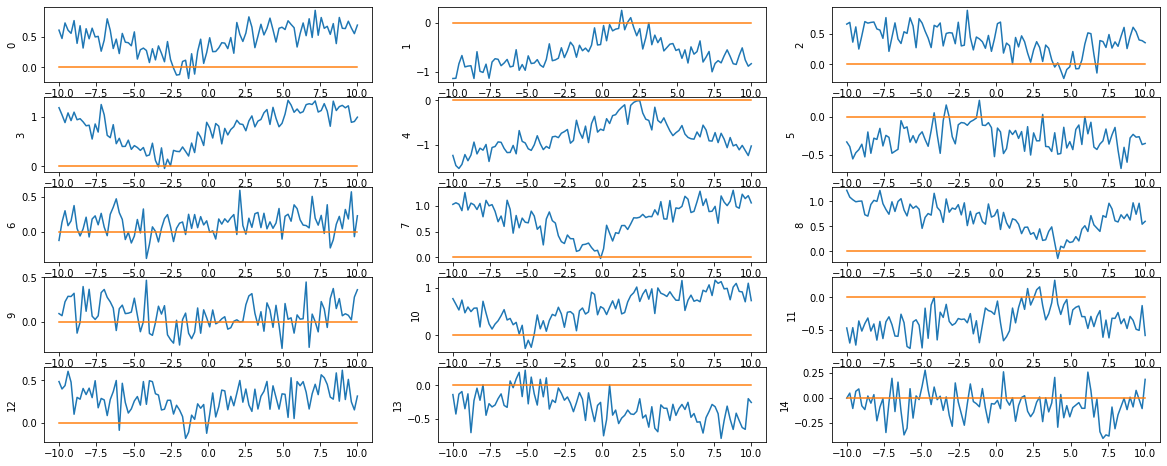

In [61]:
# plot current ys
fig,ax = plt.subplots(5,3,figsize=(20,8))
num = 0
for i in range(len(ax)):
    for j in range(len(ax[0])):
        _ = ax[i,j].plot(x,ys[num])
        _ = ax[i,j].plot((-10,10),(0,0))
        _ = ax[i,j].set_ylabel(str(num))
        num +=1

# DO SAVE

In [286]:
# current_num = 1306

pleasecheckyourtype:sinusoidal -- y
0 : data/signal1321_type=sinusoidal
1 : data/signal1322_type=sinusoidal
2 : data/signal1323_type=sinusoidal
3 : data/signal1324_type=sinusoidal
4 : data/signal1325_type=sinusoidal
5 : data/signal1326_type=sinusoidal
6 : data/signal1327_type=sinusoidal
7 : data/signal1328_type=sinusoidal
8 : data/signal1329_type=sinusoidal
9 : data/signal1330_type=sinusoidal
10 : data/signal1331_type=sinusoidal
11 : data/signal1332_type=sinusoidal
12 : data/signal1333_type=sinusoidal
13 : data/signal1334_type=sinusoidal
14 : data/signal1335_type=sinusoidal


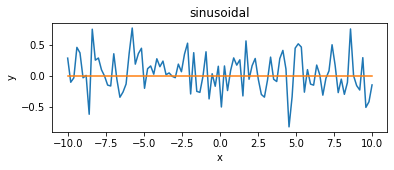

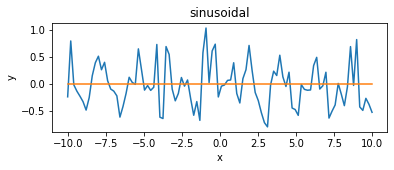

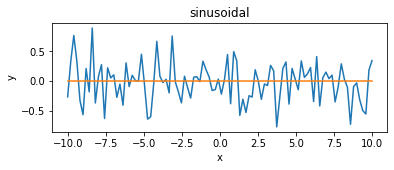

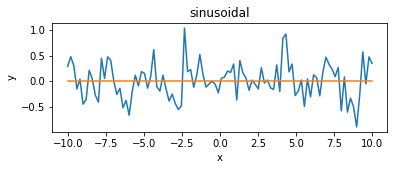

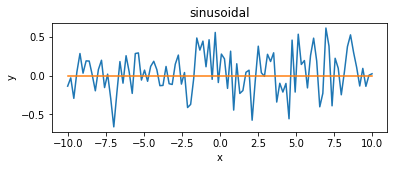

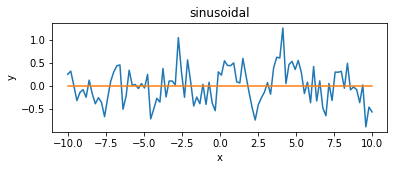

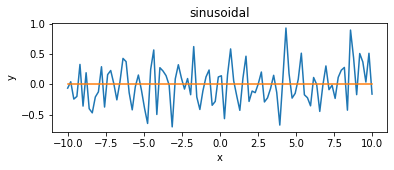

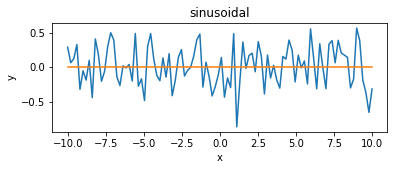

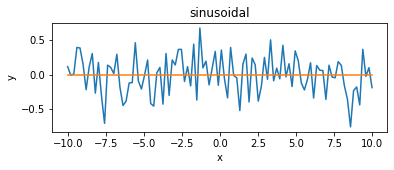

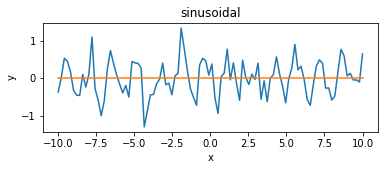

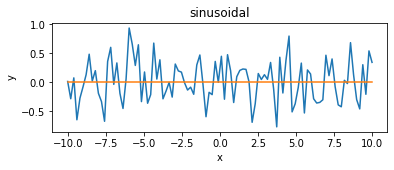

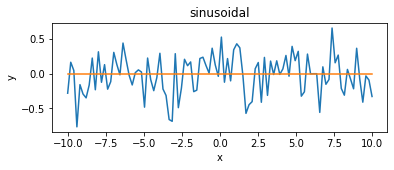

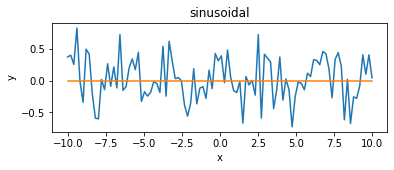

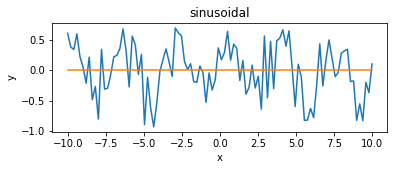

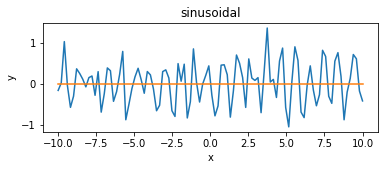

In [289]:
caselist = [1,2,3,4,6,8,10,12]
# always pay attention to the currentnum
# remember to set the right savetype
savetype = 'sinusoidal'
if input('pleasecheckyourtype:%s -- '%savetype) == 'y':
    current_num = save_data_n_plot(ys,savetype,caselist,current_num)